# **Support Vector Machines**
> A support vector machine (SVM) is a machine learning algorithm that uses supervised learning models to solve complex classification, regression, and outlier detection problems by performing optimal data transformations that `determine boundaries between data points based on predefined classes, labels, or outputs`.

Support Vector Machines (SVM) is a `supervised machine learning algorithm` which can be used for both classification or regression challenges. 

However,  it is mostly used in classification problems. 

In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).

**Three Important Key Terms:**
1. `Hyperplane`: In the context of Support Vector Machines (SVM), a hyperplane is a decision boundary that separates different classes. In a 2-dimensional space, a hyperplane is a line. In a 3-dimensional space, it's a plane, and in higher dimensions, it's called a hyperplane. The goal of SVM is to find the optimal hyperplane that separates the classes with the maximum margin.

2. `Support Vectors`: Support vectors are the data points that are closest to the hyperplane and influence its orientation and position. These points are on the edge of the margin. If these points are moved, the position of the hyperplane would change. Other points further from the hyperplane do not change its position, hence they are not support vectors.

3. `Margin`: The margin in SVM is the distance between the hyperplane (decision boundary) and the nearest data point from either of the two classes. The objective of SVM is to maximize this margin, providing as much space as possible between the decision boundary and the closest points from each class, which helps to reduce the generalization error. The hyperplane that achieves this maximum margin is called the maximum-margin hyperplane.

**Use Cases of SVMs:**
| Use Case | Description |
|----------|-------------|
| Image Classification | SVMs can classify images into different categories after being trained on a labeled dataset. |
| Text Categorization | SVMs can handle high dimensional data, making them effective for tasks like sentiment analysis, spam detection, and news article categorization. |
| Handwriting Recognition | SVMs can be trained on a dataset of handwritten characters and then classify new characters into one of the learned categories. |
| Bioinformatics | SVMs are used for protein classification and cancer classification, as they can effectively handle high-dimensional and sparse data in these domains. |
| Face Detection | SVMs can classify parts of the image as a face and non-face, creating a square boundary around the face. |
| Outlier Detection | SVMs can be used for anomaly detection. They are trained on a dataset representing normal behavior and can then detect anomalies as deviations from the normal behavior. |

**Types of SVM kernels:**

1. Linear Kernel
2. Polynomial Kernel
3. Radial Basis Function Kernel (RBF)
4. Sigmoid Kernel

1. `Linear Kernel`: A linear kernel can be used when the data is linearly separable, that is, it can be separated using a single line. It is one of the most common kernels to be used. It is represented by the inner product of the two input points.
2. `Polynomial Kernel`: A polynomial kernel is a more generalized form of the linear kernel. It can distinguish curved or nonlinear input space. 
3. `Radial Basis Function (RBF) Kernel`: The RBF kernel can map an input space in infinite dimensional space. It is used when there is no prior knowledge about the data. In other words, we can use the RBF kernel when we have no idea what kernel to use.
4. `Sigmoid Kernel`: The sigmoid kernel has values very close to either 1 or 0 and is similar to the signum function in perceptrons. It is often used in neural networks.

Remember, the choice of kernel depends on the data. If the data is linearly separable, the linear kernel is the best choice. If the data is not linearly separable, a nonlinear kernel like polynomial or RBF can be used.

#### **1. Import Libraries:**

In [1]:
# Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#### **2. Import Dataset:**

In [2]:
# Import the Dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#### **3. Separate Features (X) and Target (y):**

In [4]:
# Separate Features (X) and Target (y)
X = df.drop('species', axis=1)
y = df['species']

#### **4. Train Test Split the Data:**

In [5]:
# Train Test Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### **5. Build the Model:**

#### **5.1 Call/Create the Model:**

In [6]:
# Call / Create the Model
model = SVC(kernel='rbf')

#### **5.2 Train the Model:**

In [8]:
# Train the model
model.fit(X_train, y_train)

SVC()

#### **6 Prediction:**

In [9]:
# Predict the model
y_pred = model.predict(X_test)

#### **7 Evaluate the Model:**

In [10]:
# Evaluate the Model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The output shows the results of evaluating a classification model using a confusion matrix and a classification report.

The **confusion matrix** is a 3x3 matrix because there are three classes: setosa, versicolor, and virginica. Each row of the matrix represents the instances of an actual class and each column represents the instances of a predicted class. The `diagonal elements represent the number of points for which the predicted label is equal to the true label`, while `off-diagonal elements` are those that are `mislabeled by the classifier`. The higher the diagonal values of the confusion matrix, the better, indicating many correct predictions.

From the `confusion matrix`, we can see that all the predictions are correct. There are no off-diagonal elements, meaning there are no misclassifications. Each class has been perfectly classified.

The classification report provides a breakdown of each class by precision, recall, f1-score and support:

- **Precision** is the ability of the classifier not to label a positive sample as negative. For all classes, it's `1.00`, meaning there were no instances where a sample belonging to a different class was classified as this class.

- **Recall** is the ability of the classifier to find all the positive samples. For all classes, it's `1.00`, meaning all samples of this class were correctly classified.

- The **F1 score** is a `weighted harmonic mean of precision and recall`. An F1 score reaches its best value at `1` (perfect precision and recall) and worst at `0`. For all classes, it's 1.00, indicating perfect precision and recall.

- **Support** is the number of actual occurrences of the class in the specified dataset. For instance, there are `10` instances of '`setosa`', `9` instances of '`versicolor`', and `11` instances of '`virginica`' in the dataset.

The **accuracy** of the model is `1.00`, indicating that the model has achieved `100% accuracy` on the test data. This is an excellent result, suggesting that the model is performing extremely well. 

> However, it's also worth noting that perfect results like this might be a sign of overfitting, especially if the model performs significantly worse on new, unseen data.

#### **7.1 Draw the Confusion Matrix:**

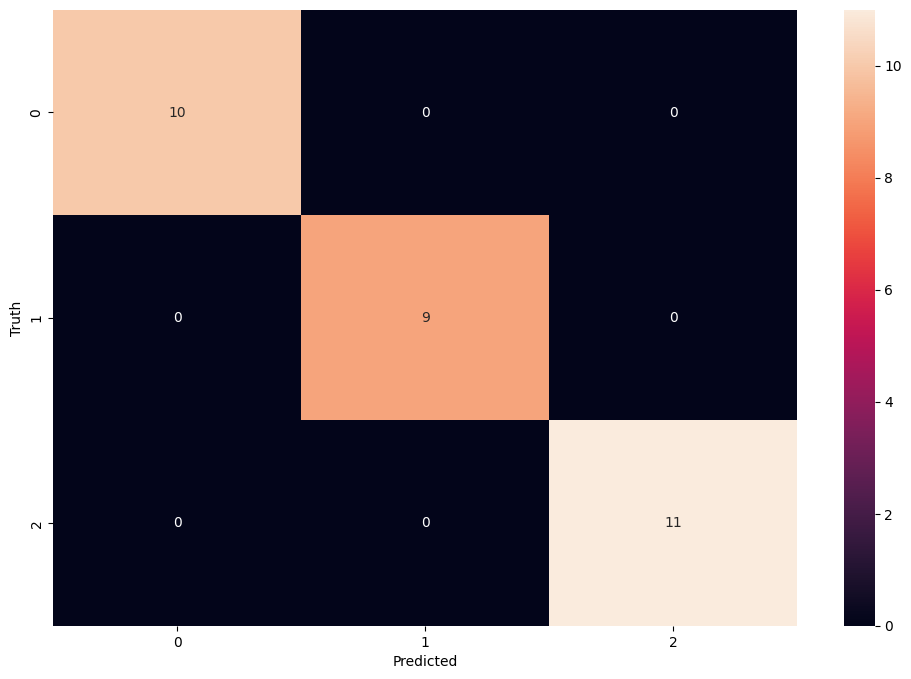

In [11]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### 8. Save the Model

In [12]:
# Save the Model using pickle
import pickle
pickle.dump(model, open('./saved_models/03_support_vector_machines.pkl', 'wb'))

----
# **SVR**
> Using SVMs for regression is known as Support Vector Regression (SVR). The main idea behind SVR is to `minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated`.

Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. 

In [13]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the iris dataset
iris = sns.load_dataset('iris')

# Define features and target
X = iris.drop('sepal_length', axis=1)
y = iris['sepal_length']

# Convert categorical features into numerical
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
model = SVR()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.10717784186702853


SVM Applications:
1. Time series prediction
2. Anomaly detection
3. Function approximation
4. Classification of images
5. Handwriting recognition
6. Bioinformatics
7. Protein structure prediction
8. Regression
9. Outlier detection
10. Clustering
11. Text and hypertext categorization
12. Image classification
13. Face detection
14. Intrusion detection
15. Financial forecasting

#### **Outlier Detection:**
Using SVMs for outlier detection is a common use case. The SVM algorithm is trained on a dataset representing normal behavior and can then detect anomalies as deviations from the normal behavior.

c:\Users\Hp\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Temp\ipykernel_8520\3889503792.py:44: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  plt.legend([a.collections[0], b1, b2],


NameError: name 'matplotlib' is not defined

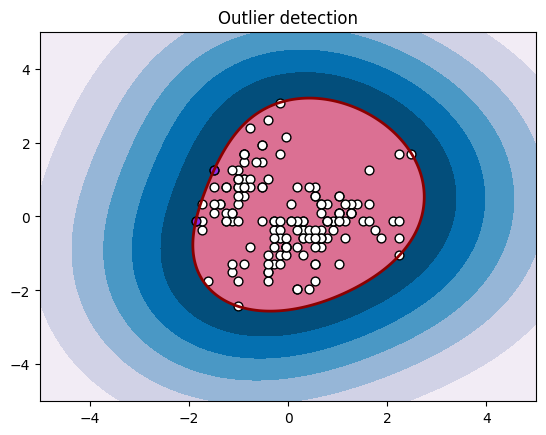

In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
import seaborn as sns

# Load the iris dataset
iris = sns.load_dataset('iris')

# Define features
X = iris[['sepal_length', 'sepal_width']]

# Standardize features to have mean=0 and variance=1
X_std = (X - X.mean()) / X.std()

# Define the model
model = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
model.fit(X_std)

# Predict the outliers
pred = model.predict(X_std)

# Outliers are marked with a -1 by the OneClassSVM
outliers = X_std[model.predict(X_std) == -1]

# Plot the line, the points, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Outlier detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_std['sepal_length'], X_std['sepal_width'], c='white', s=s, edgecolors='k')
b2 = plt.scatter(outliers['sepal_length'], outliers['sepal_width'], c='blueviolet', s=s,
                 edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2],
           ["learned frontier", "normal observations",
            "abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()